In [1]:
import numpy as np

# Homework 4
## Soroush Khadem

## Problem 1

In [2]:
f = lambda x : 1 / (1 - x)

In [3]:
relAccuracy = lambda x, true : np.abs(x - true)/np.abs(true)
numDigits   = lambda x, true : -np.log10( relAccuracy(x, true) + 1e-100 )

### Part II

In [4]:
numDigits(f(1 - 1e-13), 1e13)

3.5074511814908544

This makes sense because it means that we lost 13 digits, which is what was predicted by the condition number

### Part IV

In [5]:
numDigits(f(1 - 1.13e-13), 1.13e13)

0.6635467129687505

## Problem 2

In [6]:
from scipy import interpolate
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.25

In [7]:
# The true function: sin(20x)
f = lambda x : np.sin(20*x)

In [8]:
xs = np.random.uniform(low=1.01, high=1.99, size=(int(1e5),))
ns = np.arange(10, 10000)
natural_error = []
not_knot_error = []
for n in ns:
    nodes = np.linspace(1, 2, num=n+1)
    natural_s = interpolate.CubicSpline(nodes, f(nodes), bc_type='natural')
    not_knot_s = interpolate.CubicSpline(nodes, f(nodes), bc_type='not-a-knot')
    natural_error.append(np.max(np.abs(f(xs) - natural_s(xs))))
    not_knot_error.append(np.max(np.abs(f(xs) - not_knot_s(xs))))

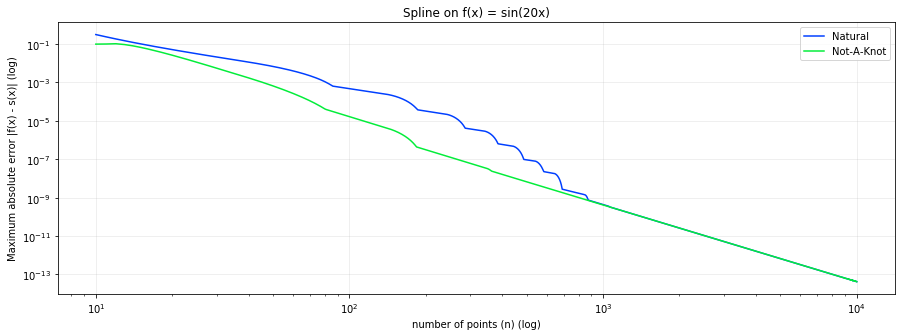

In [9]:
plt.plot(ns, natural_error)
plt.plot(ns, not_knot_error)
plt.xscale('log')
plt.yscale('log')
plt.title('Spline on f(x) = sin(20x)')
plt.xlabel('number of points (n) (log)')
plt.ylabel('Maximum absolute error |f(x) - s(x)| (log)')
plt.legend(['Natural','Not-A-Knot'])
plt.show()

### Part B

This is the convergence I expect, since the error approaches a straight line on a log log plot, and the convergence for a cubic cpline should be 4th order accurate. I expect a convergence of $\frac{1}{n^4}$

### Part C

In [10]:
xs = np.random.uniform(low=1, high=2, size=(int(1e5),))
ns = np.arange(10, 10000)
natural_error = []
not_knot_error = []
for n in ns:
    nodes = np.linspace(1, 2, num=n+1)
    natural_s = interpolate.CubicSpline(nodes, f(nodes), bc_type='natural')
    not_knot_s = interpolate.CubicSpline(nodes, f(nodes), bc_type='not-a-knot')
    natural_error.append(np.max(np.abs(f(xs) - natural_s(xs))))
    not_knot_error.append(np.max(np.abs(f(xs) - not_knot_s(xs))))

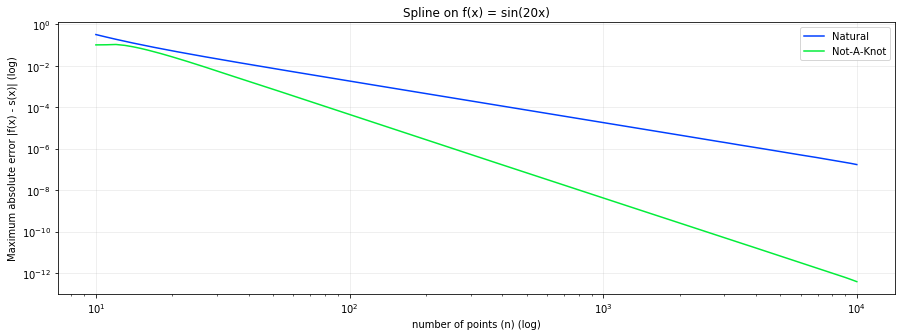

In [11]:
plt.plot(ns, natural_error)
plt.plot(ns, not_knot_error)
plt.xscale('log')
plt.yscale('log')
plt.title('Spline on f(x) = sin(20x)')
plt.xlabel('number of points (n) (log)')
plt.ylabel('Maximum absolute error |f(x) - s(x)| (log)')
plt.legend(['Natural','Not-A-Knot'])
plt.show()

Because now the test points include the boundaries, the 'Not-A-Knot' method has a faster convergence, since it handles data on the end points more accuractely, by specifying that the 3rd derivative should be 0 at the end points. Thus, it has a higher rate of convergence compared to the natural method, as shown by the steeper slope

### Part D

In [14]:
g_func = lambda x : f(x) if x < 1.3 else f(2.6-x)
g = np.vectorize(g_func)

In [15]:
xs = np.random.uniform(low=1.01, high=1.99, size=(int(1e5),))
ns = np.arange(10, 1000)
natural_error = np.zeros(len(ns))
not_knot_error = np.zeros(len(ns))
for i,n in enumerate(ns):
    nodes = np.linspace(1, 2, num=n+1)
    natural_s = interpolate.CubicSpline(nodes, g(nodes), bc_type='natural')
    not_knot_s = interpolate.CubicSpline(nodes, g(nodes), bc_type='not-a-knot')
    natural_error[i] = np.max(np.abs(g(xs) - natural_s(xs)))
    not_knot_error[i] = np.max(np.abs(g(xs) - not_knot_s(xs)))

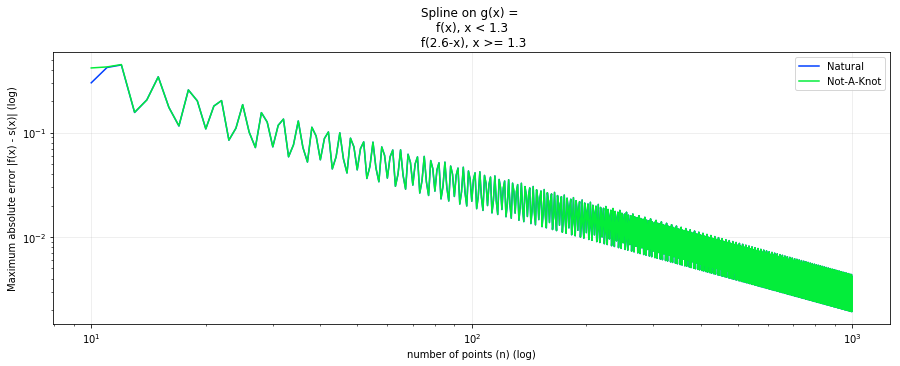

In [16]:
plt.plot(ns, natural_error)
plt.plot(ns, not_knot_error)
plt.xscale('log')
plt.yscale('log')
plt.title('Spline on g(x) = \nf(x), x < 1.3\n f(2.6-x), x >= 1.3')
plt.xlabel('number of points (n) (log)')
plt.ylabel('Maximum absolute error |f(x) - s(x)| (log)')
plt.legend(['Natural','Not-A-Knot'])
plt.show()

Since the function is not differentiable on its domain of interest (discontinuity at x = 1.3), the error of the cubic spline does not converge. This explains the oscillitory behavior.